In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

camels_ch_dir = "../../../datasets_masters/camels_ch/"
feature_dirs = {}
feature_dirs["streamflow"] = "3_CAMELScl_streamflow_mm.txt"  #
feature_dirs["precip"] = "4_CAMELScl_precip_cr2met/4_CAMELScl_precip_cr2met.txt"  #
feature_dirs["tmin"] = "8_CAMELScl_tmin_cr2met/8_CAMELScl_tmin_cr2met.txt"  #
feature_dirs["tmax"] = "9_CAMELScl_tmax_cr2met/9_CAMELScl_tmax_cr2met.txt"  #
# feature_dirs["swe"] = "13_CAMELScl_swe/"

In [3]:
# TESTING GENERAL
cut_dict = {}
for key, file in feature_dirs.items():
    print(key)
    filename = camels_ch_dir + file
    # filename = camels_ch_dir + "4_CAMELScl_precip_cr2met/4_CAMELScl_precip_cr2met.txt"
    df = pd.read_table(filename, low_memory=False)
    columns = df.columns
    print_limit = 0
    for i, col in enumerate(columns[1:]):
        progress = i / (len(columns) - 1) * 100
        if progress >= print_limit:
            print(f"{progress:.0f}%")
            print_limit += 10
        cut = df[col] != " "
        if key == "streamflow":
            dates = pd.to_datetime(df[columns[0]][cut].dropna())
            cut_dict[f"dates_{col}"] = (
                ((dates - dates.min()) / np.timedelta64(1, "D"))
                .to_numpy()
                .astype("int")
            )
            # print((cut_dict[f"dates_{col}"].dt.day.to_numpy() - cut_dict[f"dates_{col}"].dt.day.to_numpy()[0]))
            cut_dict[f"dates_{col}"] = pd.to_numeric(
                cut_dict[f"dates_{col}"] - cut_dict[f"dates_{col}"][0]
            )
        cut_dict[f"{key}_{col}"] = pd.to_numeric(df[col][cut].dropna()).to_numpy()
        del df[col]
    del df

streamflow
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
precip
0%


/home/bernhard/.local/share/virtualenvs/camels_ch-DBsEHljk/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


10%
20%
30%
40%
50%
60%
70%
80%
90%
tmin
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
tmax
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


dict_keys(['dates_1001001', 'streamflow_1001001', 'dates_1001002', 'streamflow_1001002', 'dates_1001003', 'streamflow_1001003', 'dates_1020002', 'streamflow_1020002', 'dates_1020003', 'streamflow_1020003', 'dates_1021001', 'streamflow_1021001', 'dates_1021002', 'streamflow_1021002', 'dates_1041002', 'streamflow_1041002', 'dates_1044001', 'streamflow_1044001', 'dates_1050002', 'streamflow_1050002', 'dates_1050004', 'streamflow_1050004', 'dates_1201001', 'streamflow_1201001', 'dates_1201003', 'streamflow_1201003', 'dates_1201005', 'streamflow_1201005', 'dates_1210001', 'streamflow_1210001', 'dates_1211001', 'streamflow_1211001', 'dates_1300009', 'streamflow_1300009', 'dates_1310002', 'streamflow_1310002', 'dates_1410004', 'streamflow_1410004', 'dates_1502002', 'streamflow_1502002', 'dates_1502008', 'streamflow_1502008', 'dates_1610002', 'streamflow_1610002', 'dates_1610004', 'streamflow_1610004', 'dates_1730001', 'streamflow_1730001', 'dates_1730002', 'streamflow_1730002', 'dates_1730003

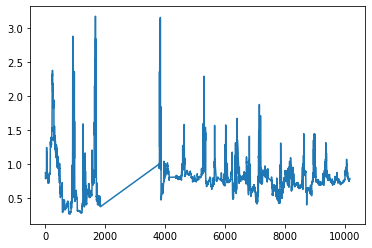

In [5]:
print(cut_dict.keys())
plt.plot(cut_dict["dates_1001001"], cut_dict["streamflow_1001001"])